# Twitter sentiment analysis during Covid-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [7]:
df = pd.read_csv("tweets.csv",usecols=["ScreenName","Location","TweetAt","OriginalTweet","Sentiment"])
df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [15]:
df['OriginalTweet'][df['Sentiment'] == 'Positive']

0       When I couldn't find hand sanitizer at Fred Me...
2       Voting in the age of #coronavirus = hand sanit...
3       Best quality couches at unbelievably low price...
4       While we were busy watching election returns a...
5       That's about a week from now. A bit optimistic...
                              ...                        
1980    Stuck inside?  How about getting some reading ...
1981    @GovLauraKelly PLEASE CLOSE ALL RETAIL that is...
1983    Just been through K?piti New World which is bu...
1984    Even though the Law Library is closed, ALL sub...
1986    Meanwhile In A Supermarket in Israel -- People...
Name: OriginalTweet, Length: 947, dtype: object

In [16]:
df.shape

(1988, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ScreenName     1988 non-null   int64 
 1   Location       1536 non-null   object
 2   TweetAt        1988 non-null   object
 3   OriginalTweet  1988 non-null   object
 4   Sentiment      1988 non-null   object
dtypes: int64(1), object(4)
memory usage: 77.8+ KB


In [18]:
df.isnull().sum()

ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [19]:
df["Sentiment"].unique()

array(['Positive', 'Negative'], dtype=object)

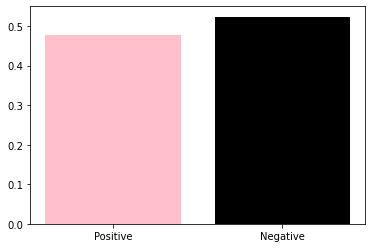

In [20]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) / len(df) for sentiment in sentiments]

plt.bar(sentiments, sentiment_nums,color=["pink","black"]);

In [21]:
loc= df['Location'].value_counts().head(10)
loc

United States       42
London, England     25
Washington, DC      22
New York, NY        20
Los Angeles, CA     16
Canada              15
London              14
California, USA     12
Atlanta, GA         12
Toronto, Ontario    11
Name: Location, dtype: int64

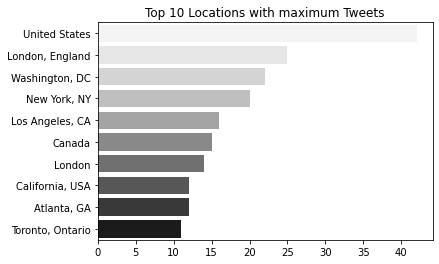

In [22]:
import seaborn as sns
a=df['Location'].value_counts().head(10)
sns.barplot(y=a.index,x=a.values,palette="Greys").set_title('Top 10 Locations with maximum Tweets');

## Text Pre-processing

In [23]:
#Converting all the alphabets to lowercase
def to_lower(word):
    result = word.lower()
    return result
t= to_lower(df.OriginalTweet[0])
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $114.97 for a 2 pack of purell??!!check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipbflmy


In [24]:
# Removing urls
import re
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)
t= remove_hyperlink(t)
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $114.97 for a 2 pack of purell??!!check out how  #coronavirus concerns are driving up prices. 


In [25]:
# Removing mentions "@"
def remove_mentions(word):
    return re.sub(r"@\S+", "", word)
t= remove_mentions(t)
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $114.97 for a 2 pack of purell??!!check out how  #coronavirus concerns are driving up prices. 


In [26]:
# removing numerals
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result
t= remove_number(t)
print(t)

when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $. for a  pack of purell??!!check out how  #coronavirus concerns are driving up prices. 


In [27]:
# removing punctutation
def remove_punctuation(word):
    result = re.sub('[^A-Za-z]+', ' ', word)
    return result
t= remove_punctuation(t)
print(t)

when i couldn t find hand sanitizer at fred meyer i turned to amazon but for a pack of purell check out how coronavirus concerns are driving up prices 


In [28]:
#removing whitespace
def remove_whitespace(word):
    result = word.strip()
    return result
t= remove_whitespace(t)
print(t)

when i couldn t find hand sanitizer at fred meyer i turned to amazon but for a pack of purell check out how coronavirus concerns are driving up prices


In [29]:
# replacing newline characters
def replace_newline(word):
    return word.replace('\n','')
t= replace_newline(t)
print(t)

when i couldn t find hand sanitizer at fred meyer i turned to amazon but for a pack of purell check out how coronavirus concerns are driving up prices


In [30]:
# tokenizing the sentences into seperate words
import nltk #text processing library
def tokenize(text):
    tokens = nltk.word_tokenize(text)    
    return list(filter(lambda word: word.isalnum(), tokens))
t= tokenize(t)
print(t)

['when', 'i', 'couldn', 't', 'find', 'hand', 'sanitizer', 'at', 'fred', 'meyer', 'i', 'turned', 'to', 'amazon', 'but', 'for', 'a', 'pack', 'of', 'purell', 'check', 'out', 'how', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices']


In [31]:
# Removing stopwords which do not add meaning to the context
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
# eg:i,a,an,from,etc..
stop_words.extend(["from","subject","summary","keywords", "article"])

def remove_stopwords(words):
    filtered = filter(lambda word: word not in stop_words, words)
    return list(filtered)
t= remove_stopwords(t)
print(t)

['find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices']


In [32]:
# Lemmatizing the words better => good
import spacy
nlp = spacy.load("en_core_web_sm") #English pipeline optimized for CPU
def lemmatize(text, nlp=nlp):
    doc = nlp(" ".join(text))
    lemmatized = [token.lemma_ for token in doc]
    lemmatized = " ".join(lemmatized)
    return lemmatized
test_text = lemmatize(t,nlp)
print(test_text)

find hand sanitizer fred meyer turn amazon pack purell check coronavirus concern drive price


In [33]:
#Cleaning the entire dataset
def cleaning_text(sentence):
    cleaning_data = [ remove_hyperlink,
                      remove_mentions,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace,
                      tokenize,
                      remove_stopwords,
                      lemmatize]
    for func in cleaning_data:
        
        sentence = func(sentence)
    return sentence

In [34]:
df["cleaned_tweets"] =df["OriginalTweet"].apply(cleaning_text)

In [35]:
df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets
0,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,find hand sanitizer fred meyer turn amazon pac...
1,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hit newyork city anxious shopper ...
2,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,vote age coronavirus hand sanitizer supertuesday
3,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,good quality couch unbelievably low price avai...
4,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,busy watch election return brace covid outbrea...


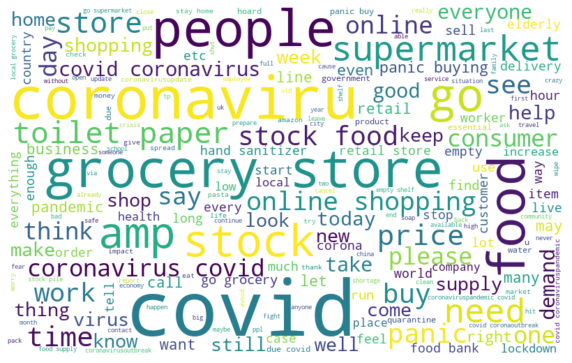

In [36]:
#visualizing the cleaned words
all_words = ' '.join([text for text in df['cleaned_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Feature Engineering & Selection

In [37]:
#labelencoding the target variable positive-->1 , negative-->0
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sentiment']= label_encoder.fit_transform(df['Sentiment']) 

In [38]:
# converting the words into vectors
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokeniser = Tokenizer(num_words=1000, lower=True)
#Create the corpus by finding the most common 
tokeniser.fit_on_texts(df["cleaned_tweets"])

In [39]:
tweet_tokens = tokeniser.texts_to_matrix(list(df["cleaned_tweets"]))

In [40]:
print(df.shape)
print(tweet_tokens.shape)

(1988, 6)
(1988, 1000)


In [41]:
#Combining the dataframe with the tokens using pd.concat
full_df = pd.concat([df, pd.DataFrame(tweet_tokens)], sort=False, axis=1)
full_df.shape

(1988, 1006)

In [42]:
full_df.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets,0,1,2,3,...,990,991,992,993,994,995,996,997,998,999
0,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1,find hand sanitizer fred meyer turn amazon pac...,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0,panic buying hit newyork city anxious shopper ...,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,1,vote age coronavirus hand sanitizer supertuesday,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,1,good quality couch unbelievably low price avai...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,1,busy watch election return brace covid outbrea...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#Features selection
X=full_df.drop(["ScreenName","TweetAt","Sentiment", "OriginalTweet", "Location", "cleaned_tweets"], axis=1)
y = full_df["Sentiment"]

## Model Fitting

In [45]:
# splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Naive Bayes

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8274622573687994
Validation accuracy Score :  0.6164154103852596
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       297
           1       0.62      0.61      0.62       300

    accuracy                           0.62       597
   macro avg       0.62      0.62      0.62       597
weighted avg       0.62      0.62      0.62       597



### Support Vector Machine

In [48]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9640546369518332
Validation accuracy Score :  0.6482412060301508
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       356
           1       0.55      0.68      0.61       241

    accuracy                           0.65       597
   macro avg       0.65      0.65      0.64       597
weighted avg       0.67      0.65      0.65       597



### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9158878504672897
Validation accuracy Score :  0.6633165829145728
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       309
           1       0.65      0.66      0.66       288

    accuracy                           0.66       597
   macro avg       0.66      0.66      0.66       597
weighted avg       0.66      0.66      0.66       597

